# Part 1: 
#### Identifying influencers (based on the intial assumption: max(friends, fans, elite years))

# ---------------------------------------------------------------------------------------------------------------
# DATA PREPARATION
# ---------------------------------------------------------------------------------------------------------------

##### Importing libraries...

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import pymongo
import pprint
from pymongo import MongoClient
%matplotlib inline


##### Creating a data base connection...

In [2]:
client = MongoClient('mongodb://localhost:27017')
db = client.yelp
con_check = str(db)
if con_check.find('yelp') != int(-1):
    print('...Connected')
else:
    print('...Connection Failed')


...Connected


##### Taking a first look at the datasets structures... 

In [3]:
# Business dataset:
# Building a small exploratory data frame limiting to 2 objects
business_data = list(db.business.find().limit(2))
business_df = pd.DataFrame(business_data)
business_df



,_id,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,57712b737b99e72215506d99,"{'Parking': {'validated': False, 'garage': Fal...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Thursday': {'open': '11:00', 'close': '21:00...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,57712b737b99e72215506d9a,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business


In [4]:
# Normalized data frame
business_norm_df = pd.DataFrame(json_normalize(business_data)) 
business_norm_df


,_id,attributes.Accepts Credit Cards,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,...,hours.Wednesday.open,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,57712b737b99e72215506d99,True,none,False,False,False,False,False,False,False,...,11:00,40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,57712b737b99e72215506d9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business


In [5]:
# Checkin dataset:
# Building a small exploratory data frame limiting to 2 objects
checkin_data = list(db.checkin.find().limit(2))
checkin_df = pd.DataFrame(checkin_data)
checkin_df

,_id,business_id,checkin_info,type
0,57712baa7b99e72215519c1e,mVHrayjG3uZ_RLHkLj-AMg,"{'10-5': 1, '12-1': 1, '14-4': 2, '12-5': 2, '...",checkin
1,57712baa7b99e72215519c1f,b12U9TFESStdy7CsTtcOeg,"{'8-2': 1, '5-1': 2, '5-5': 2}",checkin


In [6]:
# Normalized data frame
checkin_norm_df = pd.DataFrame(json_normalize(checkin_data)) 
checkin_norm_df

,_id,business_id,checkin_info.10-4,checkin_info.10-5,checkin_info.11-5,checkin_info.12-1,checkin_info.12-5,checkin_info.13-1,checkin_info.14-4,checkin_info.15-0,...,checkin_info.16-2,checkin_info.17-4,checkin_info.21-4,checkin_info.22-5,checkin_info.5-1,checkin_info.5-5,checkin_info.8-2,checkin_info.9-4,checkin_info.9-5,type
0,57712baa7b99e72215519c1e,mVHrayjG3uZ_RLHkLj-AMg,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0,1.0,checkin
1,57712baa7b99e72215519c1f,b12U9TFESStdy7CsTtcOeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,NaN,checkin


In [7]:
# Review dataset:
# Building a small exploratory data frame limiting to 2 objects
review_data = list(db.review.find().limit(2))
review_df = pd.DataFrame(review_data)
review_df

,_id,business_id,date,review_id,stars,text,type,user_id,votes
0,57712bd37b99e7221552752f,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{'funny': 0, 'useful': 0, 'cool': 0}"
1,57712bd37b99e72215527530,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{'funny': 0, 'useful': 0, 'cool': 0}"


In [8]:
# Normalized data frame
review_norm_df = pd.DataFrame(json_normalize(review_data)) 
review_norm_df

,_id,business_id,date,review_id,stars,text,type,user_id,votes.cool,votes.funny,votes.useful
0,57712bd37b99e7221552752f,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,0,0,0
1,57712bd37b99e72215527530,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,0,0,0


In [9]:
# Tip dataset:
# Building a small exploratory data frame limiting to 2 objects
tip_data = list(db.tip.find().limit(2))
tip_df = pd.DataFrame(tip_data)
tip_df
# no nested objects >> no need to normalize

,_id,business_id,date,likes,text,type,user_id
0,57712e7b7b99e722158ee6ef,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
1,57712e7b7b99e722158ee6f0,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw


In [10]:
# User dataset:
# Building a small exploratory data frame limiting to 2 objects
user_data = list(db.user.find().limit(2))
user_df = pd.DataFrame(user_data)
user_df

,_id,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,57712ea47b99e7221597eee7,4.14,"{'more': 3, 'hot': 48, 'cool': 78, 'cute': 15,...","[2005, 2006]",70,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{'funny': 167, 'useful': 280, 'cool': 245}",2004-10
1,57712ea47b99e7221597eee8,4.64,{'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{'funny': 1, 'useful': 11, 'cool': 5}",2004-10


In [11]:
# Normalized data frame
user_norm_df = pd.DataFrame(json_normalize(user_data)) 
user_norm_df

,_id,average_stars,compliments.cool,compliments.cute,compliments.funny,compliments.hot,compliments.more,compliments.note,compliments.photos,compliments.plain,...,fans,friends,name,review_count,type,user_id,votes.cool,votes.funny,votes.useful,yelping_since
0,57712ea47b99e7221597eee7,4.14,78.0,15,11.0,48.0,3.0,20.0,14.0,25.0,...,70,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,245,167,280,2004-10
1,57712ea47b99e7221597eee8,4.64,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,5,1,11,2004-10



# ---------------------------------------------------------------------------------------------------------------
#                                      END OF DATA PREPARATION
# ---------------------------------------------------------------------------------------------------------------


# ---------------------------------------------------------------------------------------------------------------
# INFLUENCERS IDENTIFICATION

Exploring users and reviews datasets, assuming that influencers are the users with the top 10% number of:
* Elite years
* Fans
* Friends
# ---------------------------------------------------------------------------------------------------------

In [12]:
# Identifying top 10% of users with the highest number of elite years: 
# Data base query logic: 
# 1) picking users with elite years greater than 0. (There are empty arrays for some users, so there is a risk that the query
# could count and empty array of elite years as 1 elite year, while in fact there are 0 elite years )
# 2) Unwinding an elite years array for each user in the set
# 3) Grouping all documents in the collection by user_id
# 4) Counting grouped documnets in the collection
# 5) Creating a list of the returned by the query users ids and their elite years counts



elite = list(db.user.aggregate([{"$match":{"elite":{"$gt":[]}}}, {"$unwind":"$elite"},
                                 {"$group":{"_id":"$user_id", "count_elite": {"$sum":1}}}]))

In [13]:
elite_df = pd.DataFrame(elite) # Creating data frame from elite list
elite_df = elite_df.sort_values('count_elite', ascending=False) #Sorting users by the number of elite years
elite_df.loc[ : ,'count_elite'] = elite_df['count_elite'].astype(int) #Changing count_elite column`s values type to an integer type


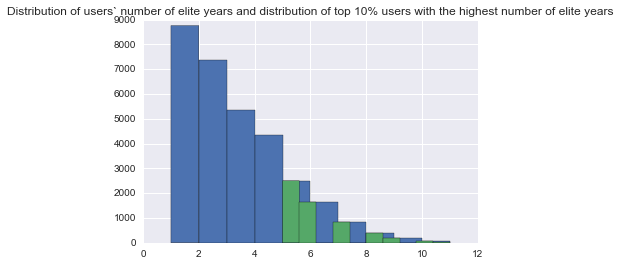

In [14]:
# Identifying top 10% users with the highest number of elite years by using np.percentile(elite_df.count_elite, 90) >> Not sure
elite_df_top = elite_df[elite_df.count_elite >= np.percentile(elite_df.count_elite, 90)]
plt.figure() # Drawing the distribution of elite years numbers of all users in the users dataset:
plt.hist(elite_df.count_elite)
plt.hist(elite_df_top.count_elite)
plt.title('Distribution of users` number of elite years and distribution of top 10% users with the highest number of elite years')

In [15]:
elite_df_top.head(2)

,_id,count_elite
3118,K2PDI4_GJLUTwjq0jA2viQ,11
3232,7uxXuCcpw9-mUS3OJVw8aQ,11


In [16]:
fans = (list(db.user.find({},{"_id":0,"fans":1, "user_id":1}))) # Querying the data base to return all users ids and fans
fans_df = pd.DataFrame(fans) # Creating a data frame from fans list
fans = [] # Clearing the fans list to empty the RAM

In [17]:
fans_df = fans_df.sort_values('fans',ascending=False) # Sorting users by fans number
fans_df = fans_df[fans_df.fans!= 0] # Cleaning the data by excluding users with no fans
fans_df = fans_df.rename(columns={'user_id': '_id'})
fans_df_top = fans_df[fans_df.fans >= np.percentile(fans_df.fans, 90)] # Identifying top 10% users with the highest number of fans

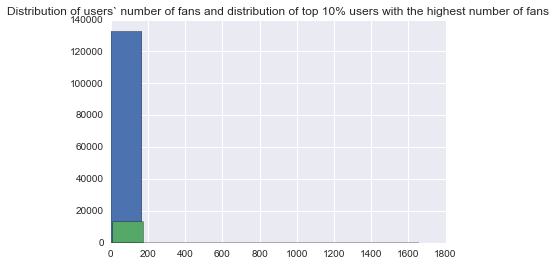

In [18]:
# Drawing the distribution of fans numbers of all users in the users dataset:
plt.figure()
plt.hist(fans_df.fans)
plt.hist(fans_df_top.fans)
plt.title('Distribution of users` number of fans and distribution of top 10% users with the highest number of fans')


In [19]:
fans_df_top.head(2)
fans_df_top = fans_df_top.reindex(columns=['_id','fans'])
fans_df_top.head(2)

,_id,fans
447242,VRCl0XzcC3n5RzfuU3gu3w,1657
325601,spJUPXI7QaIctU0FO5c42w,1363


In [20]:
# Identifying top 10% users with the highest number of fans
# Data base query logic: identical to elite years query
friends = list(db.user.aggregate([{"$match":{"friends":{"$gt":[]}}}, {"$unwind":"$friends"},
                                 {"$group":{"_id":"$user_id", "count_friends": {"$sum":1}}}]))

In [21]:
friends_df = pd.DataFrame(friends) # Creating a data frame from friends list
friends = [] # Clearing the friends list to empty the RAM

In [22]:
friends_df = friends_df.sort_values('count_friends', ascending=False) # Sorting users by the number of friends
# Identifying top 10% users with the highest number of friends
friends_df_top  = friends_df[friends_df.count_friends >= np.percentile(friends_df.count_friends,90)] 
friends_df_top.head(2)

,_id,count_friends
56288,WmAyExqSWoiYZ5XEqpk_Uw,3812
22392,AaZdXn0I6F5bdIVwGpxdDA,3206


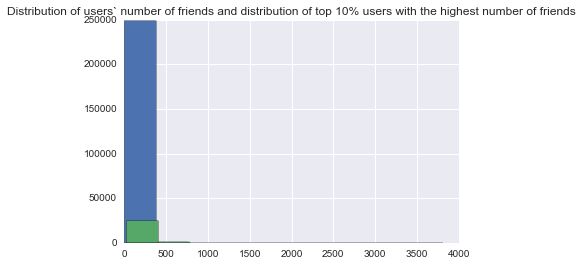

In [23]:
# Drawing the distribution of friends numbers of all users in the users dataset:
plt.figure()
plt.hist(friends_df.count_friends)
plt.hist(friends_df_top.count_friends)
plt.title('Distribution of users` number of friends and distribution of top 10% users with the highest number of friends')


In [24]:
top_df = pd.merge(friends_df_top,elite_df_top, on = '_id') # Merging top friends, top elite and top fans users in one data frame
top_df = pd.merge(top_df,fans_df_top, on = '_id')
top_df.head()
top_df.to_json('intermediate_datasets\influencers.json') # Saving the dataframe in separate json file

# ---------------------------------------------------------------------------------------------------------------

# END OF Part 1

# ---------------------------------------------------------------------------------------------------------------